### Vienna Fin de secile 

We will be analysing the texts from our Yearbooks, particularly from 1870-1913. The data is already cleaned and organised, so the purpose of this notebook is to use this cleaned data to create the data structures we need for two kinds of analysis: an evolving dynamic topic model, and creating a word embedding model on the entire data set so that we can capture semantic ideaologies.

1870-1881
1882-1897
1897-1906
1907-1913

Dynamic Topic Models backwards - where do these topics come from?

Move in fighting poverty from decentralised to centralised. 

#### Imports and Data

In [1]:
import numpy as np
import spacy
import gensim
import csv
import pandas as pd

In [2]:
docs = {}

In [3]:
with open('yearbooks_tibble_all.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        try:
            year, page, term, count, decade, total = row
            if (year, page) not in docs:
                docs[(year, page)] = []
            if (year, page) in docs:
                docs[(year, page)].append(term)
        except KeyError:
            print(row)

In [4]:
del docs[('year', 'page')] 

In [5]:
idealogy_texts = []

In [6]:
idealogy_dict = {}

In [7]:
for line in open("wohlfahrtsmodelle/Vienna1870to2009_wohlfahrtsmodelle.txt", encoding = "utf-8", errors="replace"):
    idealogy, text = line.split("=")
    idealogy = idealogy.replace(".txt", "")
    text = text[2:].replace(", \n", "")[:-1]
    words = []
    for word in text.split(" "):
        words.append(word.replace("„", "").replace("“", ""))
    idealogy_dict[idealogy] = words
    idealogy_texts.append(words)

In [8]:
len(idealogy_texts)

6

In [9]:
idealogy_texts[0]

['aufgrund',
 'struktur',
 'elberfeld',
 'system',
 'kam',
 'sicht',
 'staat',
 'kommun',
 'schwachpunkten',
 'weiterentwickl',
 'strassburg',
 'syst',
 'ausgebessert',
 'ehrenamt',
 'mitarbeit',
 'ort',
 'hilfeleist',
 'entschied',
 'fiel',
 'sicht',
 'staedt',
 'oftmal',
 'hoch',
 'gab',
 'klar',
 'trennung',
 'zweckrational',
 'programm',
 'zentralisiert',
 'entscheidungsstell',
 'ehrenamt',
 'zwangsverpflichtet',
 'ausueb',
 'fuehrt',
 'oft',
 'wenig',
 'strafmassnahmen',
 'hilfsbeduerft',
 'gab',
 'zud',
 'aufgab',
 'ausgebildet',
 '',
 'grund',
 'elberfeld',
 'syst',
 'erneuert',
 'strassburg',
 'syst',
 'umgewandelt',
 'gab',
 'zentralisiert',
 'entscheidungsgewalt',
 'sog',
 'armenamt',
 'konkret',
 'entschied',
 'gab',
 'komplett',
 'trennung',
 'system',
 'armenfuersorg',
 'verschied',
 'konditionalprogamm',
 'trennung',
 'armenfuersorg',
 'erheb',
 'buerokrati',
 'verbund',
 'buerokratisier',
 'zentral',
 'konkret',
 'hilfemassnahm',
 'entschied',
 'kontakt',
 'betroff',
 ''

In [10]:
import os

In [11]:
yearbook_pages = []

In [12]:
for doc in docs:
    yearbook_pages.append(docs[doc])

In [13]:
len(yearbook_pages)

46222

In [14]:
yearbook_pages[10]

['abgeseh',
 'abstell',
 'allein',
 'alljaehr',
 'altersklass',
 'angelegt',
 'ausschliess',
 'bedachtnahm',
 'beduerfnis',
 'belang',
 'beurteil',
 'bevoelker',
 'bezug',
 'bietet',
 'dadurch',
 'einheim',
 'einzig',
 'einzubernf',
 'element',
 'enthaelt',
 'erford',
 'ergaenz',
 'ergebnis',
 'ergibt',
 'erhob',
 'ermoeg',
 'erschi',
 'evidenzhalt',
 'fertig',
 'frueh',
 'fuehrend',
 'geburtsdat',
 'gelangt',
 'gemeindegebiet',
 'gemeindematrikel',
 'gesetz',
 'getroff',
 'grund',
 'grundlag',
 'heimatberechtigt',
 'hiesig',
 'katast',
 'kenntniss',
 'kommun',
 'kommunal',
 'kommunalverwalt',
 'kopfzettel',
 'kost',
 'militaerd',
 'militaerpflicht',
 'militaerstell',
 'nachfolg',
 'nament',
 'normiert',
 'quadriennium',
 'quantitativ',
 'regel',
 'richtigstell',
 'schied',
 'sechsjaehr',
 'sonach',
 'staatlich',
 'stand',
 'stattgefund',
 'stellung',
 'stellungsperiod',
 'stimmt',
 'stimmung',
 'umfasst',
 'verhaeltnis',
 'vicljaehr',
 'volkszaehl',
 'volkszaehlungswurd',
 'voraus',
 

In [15]:
all_texts = yearbook_pages + idealogy_texts

### Embedding Models

In [16]:
from gensim.models import Word2Vec


In [17]:
w2vmodel = Word2Vec(
        all_texts,
        size=100,
        window=10,
        workers=10,
        iter=10)

In [18]:
w2vmodel.wv.most_similar("sozial")

[('sozialhilfeaufwand', 0.9079568386077881),
 ('sozialhilfekostenersatz', 0.9019289016723633),
 ('sozialleist', 0.8932145833969116),
 ('sozialpolit', 0.8912934064865112),
 ('sozialhilf', 0.8896446228027344),
 ('sozialhilfekost', 0.8791094422340393),
 ('sechsjaehr', 0.8790538311004639),
 ('sozialversicherungstraeg', 0.8776363134384155),
 ('spezialitaetenordn', 0.8774088621139526),
 ('sozialrecht', 0.868708074092865)]

In [19]:
w2vmodel.wv.most_similar('wohnbau')

[('wohnbaufoerderungsgesetz', 0.9446715116500854),
 ('wohnbauprogramm', 0.9393131732940674),
 ('wohnbeihilf', 0.9311527013778687),
 ('wirtschaftsfoerderungsfond', 0.9273989200592041),
 ('wohnbaut', 0.9208354949951172),
 ('wohnbautaet', 0.9199985265731812),
 ('wirtschaftsfoerder', 0.9149885773658752),
 ('wohnbaufond', 0.9137927293777466),
 ('wohnein', 0.9106440544128418),
 ('wohnhauserverwalt', 0.9103437662124634)]

In [20]:
w2vmodel.wv['sozial']

array([ 2.7541697 ,  1.9614694 ,  4.23982   ,  1.4901075 , -3.1644413 ,
        4.7833877 , -1.5488582 ,  3.141982  ,  1.5225735 ,  1.0150449 ,
       -4.1619153 ,  6.962016  , -5.2949696 ,  0.60830736, -2.2390318 ,
        6.084157  , -6.511232  , -1.2764963 , -3.8904285 , -5.296753  ,
       -1.937644  , -0.01175347,  3.233522  ,  3.3840394 ,  0.85746014,
        0.14270101,  0.8755808 ,  1.7508137 , -1.2110289 , -0.45810845,
       -1.7821071 , -1.5911142 , -0.7442166 ,  0.6179256 ,  0.10888219,
       -2.8018167 , -2.700252  , -7.053898  , -1.3320615 , -1.1272995 ,
        0.7812195 ,  0.19710822, -4.785872  , -1.0122626 ,  1.8271362 ,
        2.6932278 ,  3.6161072 , -0.10068968,  6.648676  , -0.05019537,
        3.9008152 ,  2.2302976 ,  0.29842272, -1.2567216 , -2.6813686 ,
        1.4964654 , -4.2318406 , -3.3863144 , -1.4141946 , -1.9999284 ,
       -2.888723  , -3.0600014 , -1.4857936 , -1.6456214 ,  1.2490102 ,
       -3.2758238 , -1.4359999 ,  1.5676622 , -0.36368507,  3.25

In [21]:
w2vmodel.wv['wohnbau']

array([-2.9692256e+00, -1.0177054e+00,  1.4104179e+00,  4.3217015e-01,
       -6.5084898e-01, -4.4590235e-01,  1.5773335e+00, -3.1984332e-01,
       -2.3526988e+00,  4.3962243e-01, -1.6822826e+00, -1.3222784e+00,
        3.5570435e-02, -7.4214363e-01, -1.3321187e+00,  2.1995208e+00,
        2.7550006e+00,  6.0181695e-01, -1.0245944e+00, -8.8650399e-01,
        7.6776892e-01, -1.0110439e+00, -1.4687117e+00,  1.5433712e+00,
        7.2801441e-02,  1.4779131e+00,  1.7076734e+00,  1.9130514e+00,
        3.2305410e+00,  1.6179351e+00,  3.9522257e-01, -1.0530418e+00,
        8.4029241e-03,  7.5584388e-01, -3.8349527e-01,  2.2126431e+00,
       -1.1907308e+00,  7.0182800e-02,  2.8557115e+00, -5.3227109e-01,
        1.9187592e+00, -1.4758093e+00,  5.9018552e-01,  3.6075288e-01,
        6.5333849e-01,  2.8124304e+00, -3.4956178e-01,  2.6649184e+00,
        8.6851400e-01, -2.9243629e+00,  4.0513206e+00, -3.8770845e+00,
       -2.6625075e+00,  7.7423477e-01, -3.6364868e-01,  1.9535123e+00,
      

In [22]:
# time period vectors 
# look at dimensionsn and find the words which load the highest for each dimension - identifying latent features
# create idealogy vectors 

### Document Vectors

We'll train a Doc2Vec model, as well as aggregate word2vec models.

In [23]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [24]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(all_texts)]

In [25]:
d2vmodel = Doc2Vec(documents, vector_size=50)

In [26]:
def create_vector(text, model, model_type=None):
    if model_type == "word2vec":
        vectors = []
        for word in text:
            try:
                vectors.append(model.wv[word])
            except KeyError:
                pass
        if len(vectors) > 0:
            return np.mean(vectors, axis=0)
    if model_type == "doc2vec":
        vector = model.infer_vector(text)
        return vector

In [27]:
create_vector(idealogy_texts[1], w2vmodel, model_type="word2vec")

array([ 0.60984397,  0.3102498 ,  0.30061808, -0.11933362,  0.14091098,
        0.2658817 , -0.09792089,  0.45086375,  0.2936876 , -0.1268064 ,
       -0.5286196 ,  0.55842155, -0.25828055, -0.03128498, -0.17075422,
        0.4117563 , -0.5195685 , -0.21055509, -0.5986947 ,  0.02078001,
        0.22744247,  0.2607336 ,  0.12854867,  0.32565174, -0.22542529,
       -0.28155667, -0.26714998,  0.13080485, -0.32801363, -0.05511424,
       -0.1800677 , -0.56602865, -0.2898797 ,  0.00919187,  0.12374286,
       -0.37683553, -0.18000585, -0.62214345, -0.37724367,  0.02094253,
       -0.27171314,  0.09106545, -0.8846517 , -0.2086811 , -0.16662468,
        0.19722769,  0.7373337 , -0.08068076,  0.01930172,  0.21365705,
        0.18045768,  0.45659748,  0.01212208, -0.14716655,  0.08879866,
        0.03126504, -0.25849092,  0.13457002, -0.07236651, -0.29604363,
       -0.43490127,  0.00672967, -0.49937123,  0.27274844,  0.15726213,
       -0.25025797,  0.14369687,  0.4633555 , -0.0460365 ,  0.41

In [28]:
create_vector(idealogy_texts[0], d2vmodel, model_type="doc2vec")

array([ 0.88102657, -1.0677737 , -0.33197784, -0.1846511 , -0.9357193 ,
        0.733009  ,  0.50499976,  0.5615809 ,  0.5114796 ,  0.10517613,
        0.58616966,  0.03392732, -1.6839303 , -0.28150013, -1.0945325 ,
        0.2979313 , -0.5996193 ,  1.1094317 , -0.15940988, -0.21167739,
       -0.51022416, -0.37558568,  0.37885174, -0.47734576, -0.46181476,
        0.81005794, -0.04486354,  1.1089915 ,  0.1607992 ,  0.5413969 ,
        0.5381697 ,  1.5961531 , -0.25911975, -1.1167974 ,  0.03102779,
       -0.08173422,  1.2745737 , -0.2449156 , -0.27663675, -0.671108  ,
       -0.7747501 ,  0.7033325 , -0.25298268, -0.24638289,  0.08584547,
        0.01450887, -0.89695   , -1.0802348 ,  0.10163387,  0.14973009],
      dtype=float32)

In [29]:
year_wise_vectors = {}

In [30]:
decade_vectors = {}

In [31]:
time_periods_vectors_0 = {0:[], 1:[], 2:[], 3:[], 4:[]}
time_periods_vectors_1 = {0:[], 1:[], 2:[], 3:[]}

In [32]:
for year_page in docs:
    try:
        year, page = year_page
    except ValueError:
        print(year_page)
        continue
    if year not in year_wise_vectors:
        year_wise_vectors[year] = []
    if year in year_wise_vectors:
        vec = create_vector(docs[year_page], w2vmodel, "word2vec")
        if vec is not None:
            year_wise_vectors[year].append(vec)

In [33]:
year_wise_vectors_d = {}

In [34]:
decade_vectors_d = {}


In [35]:
time_periods_vectors_0_d = {0:[], 1:[], 2:[], 3:[], 4:[]}
time_periods_vectors_1_d = {0:[], 1:[], 2:[], 3:[]}

In [36]:
for year_page in docs:
    try:
        year, page = year_page
    except ValueError:
        print(year_page)
        continue
    if year not in year_wise_vectors_d:
        year_wise_vectors_d[year] = []
    if year in year_wise_vectors:
        vec = create_vector(docs[year_page], d2vmodel, "doc2vec")
        if vec is not None:
            year_wise_vectors_d[year].append(vec)

In [37]:
year_wise_final_vectors = {}

In [38]:
for year in year_wise_vectors:
    year_wise_final_vectors[year] = np.nanmean(year_wise_vectors[year], axis=0)

In [39]:
year_wise_final_vectors_d = {}

In [40]:
for year in year_wise_vectors_d:
    year_wise_final_vectors_d[year] = np.nanmean(year_wise_vectors_d[year], axis=0)

In [41]:
len(year_wise_final_vectors)

96

In [42]:
for year in sorted(year_wise_final_vectors.keys()):
    
    decade = int(int(year) / 10)
    if decade not in decade_vectors:
        decade_vectors[decade] = []
    if decade in decade_vectors:
        decade_vectors[decade].append(year_wise_final_vectors[year])


In [43]:
for decade in decade_vectors:
    try:
        decade_vectors[decade] = np.mean(decade_vectors[decade], axis=0)
    except:
        print(decade_vectors[decade], decade)
        continue

In [44]:
for year in sorted(year_wise_final_vectors_d.keys()):
    
    decade = int(int(year) / 10)
    if decade not in decade_vectors_d:
        decade_vectors_d[decade] = []
    if decade in decade_vectors_d:
        decade_vectors_d[decade].append(year_wise_final_vectors_d[year])

In [45]:
np.mean(decade_vectors_d[194], axis=0)

array([ 9.77762565e-02, -1.04969233e-01, -2.24813856e-02, -3.04030627e-02,
       -5.17832488e-02,  1.01131812e-01,  4.37081233e-02,  3.81234102e-02,
        8.88020992e-02,  5.12315333e-02,  1.19792864e-01, -1.88552402e-03,
       -1.95461228e-01,  1.44290971e-04, -8.13568383e-02,  5.58577776e-02,
       -4.47077900e-02,  2.00960964e-01,  1.06668530e-03, -2.83021145e-02,
       -7.97394961e-02, -8.47485065e-02,  6.56311363e-02, -1.36743709e-01,
       -4.29610796e-02,  1.41743317e-01, -1.73673164e-02,  7.20682591e-02,
        1.15159024e-02,  8.14015642e-02,  1.04024276e-01,  2.16394737e-01,
       -2.76308618e-02, -1.41888946e-01, -4.13312800e-02,  2.92504057e-02,
        1.67096272e-01, -4.07077260e-02, -9.01912302e-02, -6.45153597e-02,
       -1.02313012e-01,  6.57380968e-02, -8.41952637e-02, -2.76315212e-02,
        5.29842153e-02,  1.73467658e-02, -1.29689515e-01, -1.32852852e-01,
       -2.35073585e-02,  1.66469216e-02], dtype=float32)

In [46]:
for decade in decade_vectors_d:
    try:
        decade_vectors_d[decade] = np.mean(decade_vectors_d[decade], axis=0)
    except:
        print(decade_vectors_d[decade], decade)
        continue

In [47]:
decade_vectors_d

{187: array([ 5.6478761e-02, -6.1672032e-02, -1.1999692e-02, -1.8830854e-02,
        -3.3758841e-02,  5.3984948e-02,  2.6028661e-02,  1.6970349e-02,
         4.9311936e-02,  3.4594253e-02,  7.8469321e-02, -3.1105732e-03,
        -1.0859774e-01, -4.7312994e-03, -5.0575383e-02,  3.3408981e-02,
        -3.2358877e-02,  1.1260895e-01,  6.0693286e-03, -7.6347254e-03,
        -3.4718111e-02, -5.2744813e-02,  3.8459416e-02, -7.1309008e-02,
        -1.5981801e-02,  7.1661025e-02,  1.1941421e-04,  4.4816148e-02,
        -7.9461781e-05,  4.7244966e-02,  6.1188214e-02,  1.2101470e-01,
        -1.1887344e-02, -7.2089672e-02, -9.3040532e-03,  1.7773587e-02,
         9.9282220e-02, -2.9584430e-02, -5.5363595e-02, -3.4203101e-02,
        -6.6684179e-02,  4.0627867e-02, -4.1091003e-02, -1.5312516e-02,
         2.6267199e-02,  3.4948846e-04, -7.2609186e-02, -7.9487480e-02,
        -1.4015496e-02,  1.4097847e-02], dtype=float32),
 188: array([ 0.04502421, -0.05388347, -0.00745174, -0.00505245, -0.034557

In [48]:
time_periods_0 = [1867, 1914, 1946, 1968, 1989]

In [49]:
time_periods_1 = [1867, 1920, 1955, 1995]

In [50]:
for year in year_wise_final_vectors:
    if int(year) >= time_periods_0[0] and int(year) < time_periods_0[1]:
        time_periods_vectors_0[0].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_0[1] and int(year) < time_periods_0[2]:
        time_periods_vectors_0[1].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_0[2] and int(year) < time_periods_0[3]:
        time_periods_vectors_0[2].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_0[3] and int(year) < time_periods_0[4]:
        time_periods_vectors_0[3].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_0[4]:
        time_periods_vectors_0[4].append(year_wise_final_vectors[year])
        
        
    if int(year) >= time_periods_1[0] and int(year) < time_periods_1[1]:
        time_periods_vectors_1[0].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_1[1] and int(year) < time_periods_1[2]:
        time_periods_vectors_1[1].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_1[2] and int(year) < time_periods_1[3]:
        time_periods_vectors_1[2].append(year_wise_final_vectors[year])
    if int(year) >= time_periods_1[3]:
        time_periods_vectors_1[3].append(year_wise_final_vectors[year])

In [51]:
for year in year_wise_final_vectors_d:
    if int(year) >= time_periods_0[0] and int(year) < time_periods_0[1]:
        time_periods_vectors_0_d[0].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_0[1] and int(year) < time_periods_0[2]:
        time_periods_vectors_0_d[1].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_0[2] and int(year) < time_periods_0[3]:
        time_periods_vectors_0_d[2].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_0[3] and int(year) < time_periods_0[4]:
        time_periods_vectors_0_d[3].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_0[4]:
        time_periods_vectors_0_d[4].append(year_wise_final_vectors_d[year])
        
        
    if int(year) >= time_periods_1[0] and int(year) < time_periods_1[1]:
        time_periods_vectors_1_d[0].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_1[1] and int(year) < time_periods_1[2]:
        time_periods_vectors_1_d[1].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_1[2] and int(year) < time_periods_1[3]:
        time_periods_vectors_1_d[2].append(year_wise_final_vectors_d[year])
    if int(year) >= time_periods_1[3]:
        time_periods_vectors_1_d[3].append(year_wise_final_vectors_d[year])

In [52]:
for period in time_periods_vectors_0:
    time_periods_vectors_0[period] = np.mean(time_periods_vectors_0[period], axis=0)

In [53]:
for period in time_periods_vectors_1:
    time_periods_vectors_1[period] = np.mean(time_periods_vectors_1[period], axis=0)

In [54]:
for period in time_periods_vectors_0_d:
    time_periods_vectors_0_d[period] = np.mean(time_periods_vectors_0_d[period], axis=0)

In [55]:
for period in time_periods_vectors_1_d:
    time_periods_vectors_1_d[period] = np.mean(time_periods_vectors_1_d[period], axis=0)

In [56]:
idealogy_vectors = {}
idealogy_vectors_d = {}

In [57]:
for idealogy in idealogy_dict:
    idealogy_vectors[idealogy] = create_vector(idealogy_dict[idealogy], w2vmodel, "word2vec")
    idealogy_vectors_d[idealogy] = create_vector(idealogy_dict[idealogy], d2vmodel, "doc2vec")

### Analysis

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

In [59]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [60]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    cos = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)
    return np.arccos(cos)*57.2958

In [61]:
L = []
for period in time_periods_vectors_0:
    l = []
    for idealogy in idealogy_vectors:
        l.append(angle_between(idealogy_vectors[idealogy], time_periods_vectors_0[period]))
    L.append(l)

In [62]:
M = np.array(L)

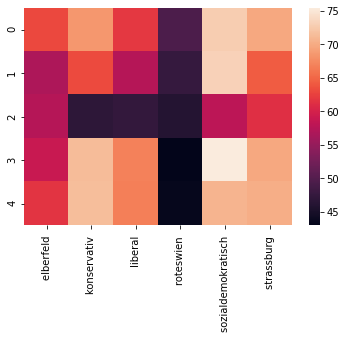

In [63]:
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(idealogy_vectors.keys()), index = list(time_periods_vectors_0.keys()))
ax = sns.heatmap(div)
plt.show()

In [64]:
L = []
for period in time_periods_vectors_1:
    l = []
    for idealogy in idealogy_vectors:
        l.append(angle_between(idealogy_vectors[idealogy], time_periods_vectors_1[period]))
    L.append(l)

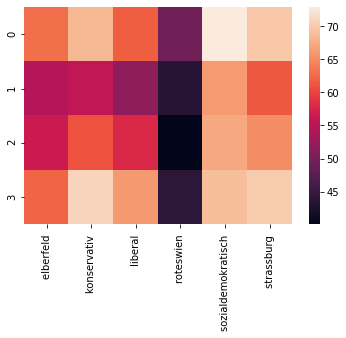

In [65]:
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(idealogy_vectors.keys()), index = list(time_periods_vectors_1.keys()))
ax = sns.heatmap(div)
plt.show()

In [66]:
L = []
for decade in decade_vectors:
    l = []
    for idealogy in idealogy_vectors:
        l.append(angle_between(idealogy_vectors[idealogy], decade_vectors[decade]))
    L.append(l)

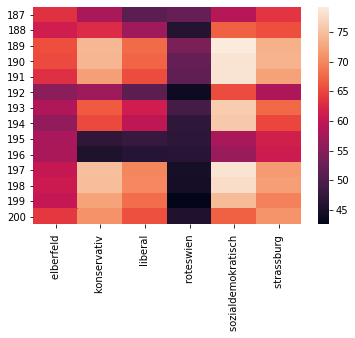

In [67]:
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(idealogy_vectors.keys()), index = list(decade_vectors.keys()))
ax = sns.heatmap(div)
plt.show()

In [68]:
L = []
for decade in decade_vectors_d:
    l = []
    for idealogy in idealogy_vectors_d:
        l.append(angle_between(idealogy_vectors_d[idealogy], decade_vectors_d[decade]))
    L.append(l)

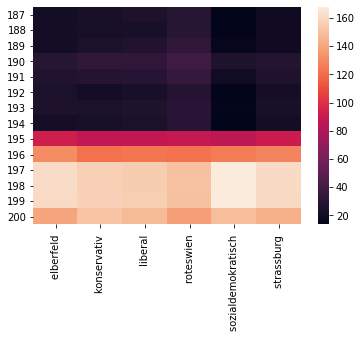

In [69]:
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(idealogy_vectors_d.keys()), index = list(decade_vectors_d.keys()))
ax = sns.heatmap(div)
plt.show()

### TODOs

check within idealogies 
check within decades
check within time periods
functions out of this
discourse atoms
